In [7]:
import re
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
from glob import glob
import gzip

In [8]:
PATH = '/scratch1/07088/tg863871/aquaplanet_h308_timing_frontera_ne4pg2_ne4pg2_CRM1_32x_125z1400m.5s_crm_nx_rad_16_CRM2_64x_125z200m.0.5s_crm_nx_rad2_16_np_346_nlev_125_nthread_1.frontera/run/'
FNAME = 'e3sm.log.2702166.210315-033935'

In [9]:
def gunzip(source_filepath, dest_filepath, block_size=65536):
    with gzip.open(source_filepath, 'rb') as s_file, \
            open(dest_filepath, 'wb') as d_file:
        while True:
            block = s_file.read(block_size)
            if not block:
                break
            else:
                d_file.write(block)

In [10]:
def find_indices(lst, condition):
    return [i for i, elem in enumerate(lst) if condition(elem)]

In [6]:
384-308

76

In [11]:
# This group of experiments use 308 heavy loading columns (384 total) with different DX and np_346
x = range(200, 2200, 200)
ntime_mean1 = [-99]
ntime_mean2 = [-99]
ntime_std1  = [-99]
ntime_std2  = [-99]
for n in x:
    PATH = '/scratch1/07088/tg863871/aquaplanet_h308_timing_frontera_ne4pg2_ne4pg2_CRM1_32x_125z'+str(n)+'m.5s_crm_nx_rad_16_CRM2_64x_125z200m.0.5s_crm_nx_rad2_16_np_346_nlev_125_nthread_1.frontera/run/'
    FNAME = glob(PATH+'e3sm.log.*.gz')
    FNAME2 = PATH+'e3sm.log.extract'
    if len(FNAME)>0:
        gunzip(FNAME[0], FNAME2)
        #print(FNAME2)
        file1 = open(FNAME2, 'r')
    else:
        file1 = open(FNAME2, 'r')
    
    #print(FNAME)
    
    Lines = file1.readlines()
    count = 1
    num_columns = [-99]
    num_time = [-99.99]
    for line in Lines:
        count += 1
        if line.find('=== Liran Timing===') != -1:
            hline=re.split(' +',line.strip())
            if len(hline) == 6:
                num_columns.append(int(hline[4]))
                num_time.append(float(hline[5]))
    
    work1 = find_indices(num_columns, lambda e: e == 1 )
    work2 = find_indices(num_columns, lambda e: e == 2 )
    work11 = [num_time[i] for i in work1]
    work22 = [num_time[i] for i in work2]
    print(mean(work11[:]))
    print(np.std(work11[:]))
    print(mean(work22[:]))
    print(np.std(work22[:]))
    ntime_mean1.append(float(mean(work11[:])))
    ntime_mean2.append(float(np.std(work11[:])))
    ntime_std1.append(float(mean(work22[:])))
    ntime_std2.append(float(np.std(work22[:])))
    print('-----------')

print(mean(ntime_mean1[1:]))    
print(mean(ntime_mean2[1:])) 
print('===========')

36.6078246939599
3.0719924466484483
3.5622912925870254
0.5333216732448217
-----------
36.6015677650621
3.081574111784959
3.5446508691928007
0.5352708950908333
-----------
36.5885974158247
3.1106675569870577
3.528629607591459
0.5501408500764334
-----------
36.60999719079141
3.0992777846748023
3.5066733905558447
0.5254683449807409
-----------
36.03439062722357
3.117054508221902
3.509538080832786
0.5246356469416361
-----------
36.593927198669085
3.0931019427910984
3.4974437417511486
0.5306421760812717
-----------
36.60587287836322
3.07785521300516
3.4897274308788937
0.5230744962179905
-----------
36.6002539620122
3.0706893943607683
3.472975207046961
0.46973688373474687
-----------
36.01991410533225
3.0786351647205663
3.471096718486239
0.47828990256314063
-----------
36.59123027241764
3.0808124561736925
3.4598140601194345
0.46864562190029574
-----------
36.48535761096561
3.0881660579368453


/scratch1/07088/tg863871/aquaplanet_h308_timing_frontera_ne4pg2_ne4pg2_CRM1_32x_125z1200m.5s_crm_nx_rad_16_CRM2_32x_125z200m.0.5s_crm_nx_rad2_16_np_327_nlev_125_nthread_1.frontera/run/e3sm.log.extract
['/scratch1/07088/tg863871/aquaplanet_h308_timing_frontera_ne4pg2_ne4pg2_CRM1_32x_125z1200m.5s_crm_nx_rad_16_CRM2_32x_125z200m.0.5s_crm_nx_rad2_16_np_327_nlev_125_nthread_1.frontera/run/e3sm.log.2708738.210316-055053.gz']
19.212588225507652
1.570284631683481
5.483893992005553
0.8684520083953818
-----------
/scratch1/07088/tg863871/aquaplanet_h308_timing_frontera_ne4pg2_ne4pg2_CRM1_32x_125z1200m.5s_crm_nx_rad_16_CRM2_64x_125z200m.0.5s_crm_nx_rad2_16_np_327_nlev_125_nthread_1.frontera/run/e3sm.log.extract
['/scratch1/07088/tg863871/aquaplanet_h308_timing_frontera_ne4pg2_ne4pg2_CRM1_32x_125z1200m.5s_crm_nx_rad_16_CRM2_64x_125z200m.0.5s_crm_nx_rad2_16_np_327_nlev_125_nthread_1.frontera/run/e3sm.log.2708740.210316-064616.gz', '/scratch1/07088/tg863871/aquaplanet_h308_timing_frontera_ne4pg2_ne4

Text(0, 0.5, 'tUP')

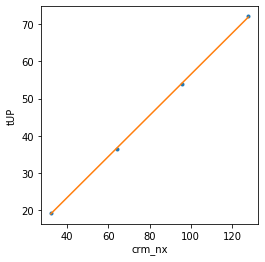

In [18]:
# This group of experiments use 308 heavy loading columns (384 total) with different CRM_NX
x = [32,64,96,128]
ntime_mean1 = [-99]
ntime_mean2 = [-99]
ntime_std1  = [-99]
ntime_std2  = [-99]
for n in x:
    PATH = '/scratch1/07088/tg863871/aquaplanet_h308_timing_frontera_ne4pg2_ne4pg2_CRM1_32x_125z1200m.5s_crm_nx_rad_16_CRM2_'+str(n)+'x_125z200m.0.5s_crm_nx_rad2_16_np_327_nlev_125_nthread_1.frontera/run/'
    FNAME = glob(PATH+'e3sm.log.*.gz')
    FNAME2 = PATH+'e3sm.log.extract'
    if len(FNAME)>0:
        gunzip(FNAME[0], FNAME2)
        print(FNAME2)
        file1 = open(FNAME2, 'r')
    else:
        file1 = open(FNAME2, 'r')
    
    print(FNAME)
    
    Lines = file1.readlines()
    count = 1
    num_columns = [-99]
    num_time = [-99.99]
    for line in Lines:
        count += 1
        if line.find('=== Liran Timing===') != -1:
            hline=re.split(' +',line.strip())
            if len(hline) == 6:
                num_columns.append(int(hline[4]))
                num_time.append(float(hline[5]))
    
    work1 = find_indices(num_columns, lambda e: e == 1 )
    work2 = find_indices(num_columns, lambda e: e == 4 )
    work11 = [num_time[i] for i in work1]
    work22 = [num_time[i] for i in work2]
    print(mean(work11[:]))
    print(np.std(work11[:]))
    print(mean(work22[:]))
    print(np.std(work22[:]))
    ntime_mean1.append(float(mean(work11[:])))
    ntime_std1.append(float(np.std(work11[:])))
    ntime_mean2.append(float(mean(work22[:])))
    ntime_std2.append(float(np.std(work22[:])))
    print('-----------')

print(ntime_mean1[1:])  
print(ntime_mean2[1:]) 
z = np.polyfit(x, ntime_mean1[1:], 1)
xp = np.linspace(32, 128, 100)
print(z)
fig = plt.figure()
ax = fig.add_subplot(111)
_ = plt.plot(x, ntime_mean1[1:], '.', xp, z[1]+z[0]*xp, '-')
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.xlabel('crm_nx')
plt.ylabel('tUP')



In [12]:
# This group of experiments use 308 heavy loading columns (384 total) with different DX and np_327
# NUP = 308 Heavy loading columns (F = NUP/NSP = 4.052631578947368)
# 76 light loading columns
# Total 327 MPI tasks
# Each heavy loading column occupy one MPI task (NUP=MUP) => 308 MPI tasks
# Light loading columns are combined => 327-308 = 19
# Therefore, 76/19=4 light loading columns are combined into one MPI task
# The CRM time for the heavy loading column is 36.53783807847956
#                      light loading column is 5.506049059630727 (4 light loading columns)
# The CRM time for each light loading column is 1.3765122649076817
# The CRM time ratio is nsp = 26.54377952885878
# ==> In an ideal case: tUP = nsp*tSP
# M = MSP/nsp + (NUP) = MSP/26.54377952885878 + 308
# From equation F = ((M*nsp)-C)/((C-M)*nsp)
# We have M = (F*C*nSP+C)/(nSP+F*nSP) = (4.05*384*26.54+384)/(26.54+4.05*26.54) = 310.8254903862654
# MSP = nSP*(M-NUP) = 26.54377952885878*(310.8254903862654-308)=74.9991938739392
# ------------------------------------------------------------------------------------------------
x = range(200, 2200, 200)
ntime_mean1 = [-99]
ntime_mean2 = [-99]
ntime_std1  = [-99]
ntime_std2  = [-99]
for n in x:
    PATH = '/scratch1/07088/tg863871/aquaplanet_h308_timing_frontera_ne4pg2_ne4pg2_CRM1_32x_125z'+str(n)+'m.5s_crm_nx_rad_16_CRM2_64x_125z200m.0.5s_crm_nx_rad2_16_np_327_nlev_125_nthread_1.frontera/run/'
    FNAME = glob(PATH+'e3sm.log.*.gz')
    FNAME2 = PATH+'e3sm.log.extract'
    if len(FNAME)>0:
        gunzip(FNAME[0], FNAME2)
        print(FNAME2)
        file1 = open(FNAME2, 'r')
    else:
        file1 = open(FNAME2, 'r')
    
    print(FNAME)
    
    Lines = file1.readlines()
    count = 1
    num_columns = [-99]
    num_time = [-99.99]
    for line in Lines:
        count += 1
        if line.find('=== Liran Timing===') != -1:
            hline=re.split(' +',line.strip())
            if len(hline) == 6:
                num_columns.append(int(hline[4]))
                num_time.append(float(hline[5]))
    #print(num_columns)
    work1 = find_indices(num_columns, lambda e: e == 1 )
    work2 = find_indices(num_columns, lambda e: e == 4 )
    work11 = [num_time[i] for i in work1]
    work22 = [num_time[i] for i in work2]
    print(mean(work11[:]))
    print(np.std(work11[:]))
    print(mean(work22[:]))
    print(np.std(work22[:]))
    ntime_mean1.append(float(mean(work11[:])))
    ntime_std1.append(float(np.std(work11[:])))
    ntime_mean2.append(float(mean(work22[:])))
    ntime_std2.append(float(np.std(work22[:])))
    print('-----------')

print(mean(ntime_mean1[1:]))    
print(mean(ntime_mean2[1:])) 
print('===========') 

/scratch1/07088/tg863871/aquaplanet_h308_timing_frontera_ne4pg2_ne4pg2_CRM1_32x_125z200m.5s_crm_nx_rad_16_CRM2_64x_125z200m.0.5s_crm_nx_rad2_16_np_327_nlev_125_nthread_1.frontera/run/e3sm.log.extract
['/scratch1/07088/tg863871/aquaplanet_h308_timing_frontera_ne4pg2_ne4pg2_CRM1_32x_125z200m.5s_crm_nx_rad_16_CRM2_64x_125z200m.0.5s_crm_nx_rad2_16_np_327_nlev_125_nthread_1.frontera/run/e3sm.log.2703685.210315-113642.gz']
36.32523989240531
3.1011949799008147
5.686599986976945
0.8812422901226334
-----------
/scratch1/07088/tg863871/aquaplanet_h308_timing_frontera_ne4pg2_ne4pg2_CRM1_32x_125z400m.5s_crm_nx_rad_16_CRM2_64x_125z200m.0.5s_crm_nx_rad2_16_np_327_nlev_125_nthread_1.frontera/run/e3sm.log.extract
['/scratch1/07088/tg863871/aquaplanet_h308_timing_frontera_ne4pg2_ne4pg2_CRM1_32x_125z400m.5s_crm_nx_rad_16_CRM2_64x_125z200m.0.5s_crm_nx_rad2_16_np_327_nlev_125_nthread_1.frontera/run/e3sm.log.2703693.210315-114013.gz']
36.56696601057803
3.1024494440926533
5.585760264930095
0.862374281788529

In [16]:
x = range(200, 2200, 200)
ntime_mean1 = [-99]
ntime_mean2 = [-99]
ntime_std1  = [-99]
ntime_std2  = [-99]
for n in x:
    PATH = '/scratch1/07088/tg863871/aquaplanet_h154_timing_frontera_ne4pg2_ne4pg2_CRM1_32x_125z'+str(n)+'m.5s_crm_nx_rad_16_CRM2_64x_125z200m.0.5s_crm_nx_rad2_16_np_177_nlev_125_nthread_1.frontera/run/'
    FNAME = glob(PATH+'e3sm.log.*.gz')
    FNAME2 = PATH+'e3sm.log.extract'
    if len(FNAME)>0:
        gunzip(FNAME[0], FNAME2)
        print(FNAME2)
        file1 = open(FNAME2, 'r')
    else:
        file1 = open(FNAME2, 'r')
    
    print(FNAME)
    
    Lines = file1.readlines()
    count = 1
    num_columns = [-99]
    num_time = [-99.99]
    for line in Lines:
        count += 1
        if line.find('=== Liran Timing===') != -1:
            hline=re.split(' +',line.strip())
            if len(hline) == 6:
                num_columns.append(int(hline[4]))
                num_time.append(float(hline[5]))
    #print(num_columns)
    work1 = find_indices(num_columns, lambda e: e == 1 )
    work2 = find_indices(num_columns, lambda e: e == 10 )
    work11 = [num_time[i] for i in work1]
    work22 = [num_time[i] for i in work2]
    print(mean(work11[:]))
    print(np.std(work11[:]))
    print(mean(work22[:]))
    print(np.std(work22[:]))
    ntime_mean1.append(float(mean(work11[:])))
    ntime_std1.append(float(np.std(work11[:])))
    ntime_mean2.append(float(mean(work22[:])))
    ntime_std2.append(float(np.std(work22[:])))
    print('-----------')

print(mean(ntime_mean1[1:]))    
print(mean(ntime_mean2[1:])) 
print('===========') 

/scratch1/07088/tg863871/aquaplanet_h154_timing_frontera_ne4pg2_ne4pg2_CRM1_32x_125z200m.5s_crm_nx_rad_16_CRM2_64x_125z200m.0.5s_crm_nx_rad2_16_np_177_nlev_125_nthread_1.frontera/run/e3sm.log.extract
['/scratch1/07088/tg863871/aquaplanet_h154_timing_frontera_ne4pg2_ne4pg2_CRM1_32x_125z200m.5s_crm_nx_rad_16_CRM2_64x_125z200m.0.5s_crm_nx_rad2_16_np_177_nlev_125_nthread_1.frontera/run/e3sm.log.2702072.210315-003901.gz']
35.32970708791544
1.1867728332324596
16.13090262685791
4.019997329314274
-----------
/scratch1/07088/tg863871/aquaplanet_h154_timing_frontera_ne4pg2_ne4pg2_CRM1_32x_125z400m.5s_crm_nx_rad_16_CRM2_64x_125z200m.0.5s_crm_nx_rad2_16_np_177_nlev_125_nthread_1.frontera/run/e3sm.log.extract
['/scratch1/07088/tg863871/aquaplanet_h154_timing_frontera_ne4pg2_ne4pg2_CRM1_32x_125z400m.5s_crm_nx_rad_16_CRM2_64x_125z200m.0.5s_crm_nx_rad2_16_np_177_nlev_125_nthread_1.frontera/run/e3sm.log.2702075.210315-004501.gz']
35.34519022243102
1.1992937947344668
15.736065705620641
3.915508835298031

In [54]:
C = 384.0
NUP = 308.0
Fpre = NUP/C
print(Fpre)
#np = 327.0
nsp = 36.48535761096561/(3.088/2.0)
nsp = 0.2*nsp
print(nsp)
MSP = C-NUP
print(MSP)
M = MSP/nsp + (NUP)
print(M)
Term1 = ((M*nsp)-C)
print(Term1)
Term2 = ((C-M)*nsp)
print(Term2)
F = ((M*nsp)-C)/((C-M)*nsp)
print(F)

0.8020833333333334
4.726082592093991
76.0
324.08097161212044
1147.6334383649491
283.18227699914326
4.052631578947369


In [12]:
C = 384.0
np = 346
nsp = 20.9
MSP = C-327
M = MSP + (np)/nsp
print(M)
Term1 = ((M*nsp)-C)
Term2 = ((C-M)*nsp)
F = ((M*nsp)-C)/((C-M)*nsp)
print(F)

73.55502392344498
0.17775072052771915


In [15]:
C = 6144.0
x = range(1,6144,10)
nSP = 26.54
for nup in x:
    print('-----------')
    F = nup/(C-nup)
    M = (F*C*nSP+C)/(nSP+F*nSP)
    print(nup)
    print(nup/C)
    print(M)


-----------
1
0.00016276041666666666
232.46194423511682
-----------
11
0.0017903645833333333
242.08515448379805
-----------
21
0.00341796875
251.7083647324793
-----------
31
0.005045572916666667
261.33157498116054
-----------
41
0.006673177083333333
270.9547852298418
-----------
51
0.00830078125
280.577995478523
-----------
61
0.009928385416666666
290.2012057272042
-----------
71
0.011555989583333334
299.8244159758855
-----------
81
0.01318359375
309.4476262245667
-----------
91
0.014811197916666666
319.07083647324794
-----------
101
0.016438802083333332
328.69404672192917
-----------
111
0.01806640625
338.3172569706104
-----------
121
0.019694010416666668
347.9404672192916
-----------
131
0.021321614583333332
357.56367746797287
-----------
141
0.02294921875
367.1868877166541
-----------
151
0.024576822916666668
376.81009796533533
-----------
161
0.026204427083333332
386.43330821401656
-----------
171
0.02783203125
396.0565184626978
-----------
181
0.029459635416666668
405.679728711379

In [12]:
print(range(1, 6, 2))

range(1, 6, 2)


In [17]:
(4.05*384*20+384)/(26.54+4.05*20)

292.80267807327505